In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [4]:
data = pd.read_csv("stroke.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# Cleaning of data

From the data, we see that there are null values in the smoking_status column

The description of the columns are as follows:

Column | Description | Info
:-|:-|:-
id| Patient ID number    
gender| Gender of the patient| ("Male", "Female" or "Other")
age| Age of the patient | 
hypertension| Whether the patient has hypertension| (0: No hypertension, 1: Has hypertension)   
heart_disease| Whether the patient has heart disease| (0: No heart disease, 1: Has heart disease)
ever_married| Whether the patient is married| ("No" or "Yes")
work_type| Working type of patient| ("children", "Govt_job", "Never_worked", "Private" or "Self-employed")
Residence_type| Resident type of patient| ("Rural" or "Urban")
avg_glucose_level| Average glucose level in blood of patient
bmi| Body Mass Index of patient
smoking_status| Whether patient smoke| ("formerly smoked", "never smoked", "smokes" or "Unknown")
stroke| Whether the patient has a stroke| (0: No stroke, 1: Has stroke)

In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


### Observations
With 43400 data points, the dataset has a sufficient number of data points. Generally the dataset looks fine.

However, in order to resolve the following issues with the dataset, we still need to do the following:
* Remove unnecessary columns
* Encoding gender column
* Remove outliers
* Categorising the glucose_level column
* Filling the NULL data in some of the columns

# Cleaning of data

### Removing unnecessary columns
In order to match the variables in the cardiovascular dataset, we remove the unnecessary variables 

In [8]:
for i in ['id', 'heart_disease', 'ever_married', 'work_type', 'Residence_type']:
    data.drop([i], axis='columns', inplace=True)

data.head()

,gender,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,95.12,18.0,NaN,0
1,Male,58.0,1,87.96,39.2,never smoked,0
2,Female,8.0,0,110.89,17.6,NaN,0
3,Female,70.0,0,69.04,35.9,formerly smoked,0
4,Male,14.0,0,161.28,19.1,NaN,0


### Removing outliers
We notice that in the age, avg_glucose_level and bmi columns, the min and max have unrealistic values.
We assume that 5% of the dataset are outliers, and remove the entries that lie in the top 2.5% and bottom 2.5%, this will remove the unrealistic min and max values as well

In [9]:
age_outliers = data[(data['age'] > data['age'].quantile(0.975)) | 
                  (data['age'] < data['age'].quantile(0.025))].index

glucose_outliers = data[(data['avg_glucose_level'] > data['avg_glucose_level'].quantile(0.975)) | 
                  (data['avg_glucose_level'] < data['avg_glucose_level'].quantile(0.025))].index

bmi_outliers   = data[(data['bmi'] > data['bmi'].quantile(0.975)) | 
                  (data['bmi'] < data['bmi'].quantile(0.025))].index

In [10]:
toremove = set(list(age_outliers) + list(glucose_outliers) + list(bmi_outliers))

data.drop(toremove, inplace=True)
data.describe()

,age,hypertension,avg_glucose_level,bmi,stroke
count,37661.000000,37661.000000,37661.000000,36378.000000,37661.000000
mean,42.634992,0.088500,101.951488,28.462208,0.016702
std,21.049143,0.284025,37.252397,6.475549,0.128153
min,1.880000,0.000000,58.120000,16.200000,0.000000
25%,26.000000,0.000000,78.220000,23.700000,0.000000
50%,44.000000,0.000000,91.540000,27.900000,0.000000
75%,59.000000,0.000000,110.280000,32.600000,0.000000
max,80.000000,1.000000,226.030000,46.600000,1.000000


### Encoding gender column

In [11]:
data['gender'].describe()

count      37661
unique         3
top       Female
freq       22370
Name: gender, dtype: object

In [12]:
# For those whose gender is other, we will assume they are female. 
# This is because both datasets contain more females to males, we follow the majority gender.

data.replace(to_replace=r'Other', value='Female', regex=True, inplace=True)

#Check that there are only 2 unique values after replacing
data['gender'].describe()

count      37661
unique         2
top       Female
freq       22381
Name: gender, dtype: object

In [13]:
#Encoding the Gender variable
genders = pd.get_dummies(data.gender)
genders.rename(columns={"Female": "female", "Male": "male"}, inplace=True)

#Concat to our original dataframe
data = pd.concat([data, genders], axis=1)
data = data.drop(["gender"], axis=1)
data.head()

,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke,female,male
0,3.0,0,95.12,18.0,NaN,0,0,1
1,58.0,1,87.96,39.2,never smoked,0,0,1
2,8.0,0,110.89,17.6,NaN,0,1,0
3,70.0,0,69.04,35.9,formerly smoked,0,1,0
4,14.0,0,161.28,19.1,NaN,0,0,1


### Chaning age to int64 type

In [14]:
data['age'] = data['age'].astype(np.int64)

data.head()

,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke,female,male
0,3,0,95.12,18.0,NaN,0,0,1
1,58,1,87.96,39.2,never smoked,0,0,1
2,8,0,110.89,17.6,NaN,0,1,0
3,70,0,69.04,35.9,formerly smoked,0,1,0
4,14,0,161.28,19.1,NaN,0,0,1


### Categorising the glucose_level column

![title](img/glucose.png)

From the above table, we use the fasting glucose_level column as we assume the patients took the
measurements when fasting.
We can categorise the glucose levels as follows:
* Normal (<= 100): 1       
* Pre-diabetic (101-125): 2 
* Diabetic (>= 126): 3     

In [15]:
data['avg_glucose_level'] = data['avg_glucose_level'].apply(lambda x: 1 if x <= 100 else 2 if x <= 125 else 3)
data.rename(columns={"avg_glucose_level": "gluc"}, inplace=True)

data.head()

,age,hypertension,gluc,bmi,smoking_status,stroke,female,male
0,3,0,1,18.0,NaN,0,0,1
1,58,1,1,39.2,never smoked,0,0,1
2,8,0,2,17.6,NaN,0,1,0
3,70,0,1,35.9,formerly smoked,0,1,0
4,14,0,3,19.1,NaN,0,0,1


### Filling the NULL data in some of the columns

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37661 entries, 0 to 43398
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37661 non-null  int64  
 1   hypertension    37661 non-null  int64  
 2   gluc            37661 non-null  int64  
 3   bmi             36378 non-null  float64
 4   smoking_status  26965 non-null  object 
 5   stroke          37661 non-null  int64  
 6   female          37661 non-null  uint8  
 7   male            37661 non-null  uint8  
dtypes: float64(1), int64(4), object(1), uint8(2)
memory usage: 2.1+ MB


We notice that there are NULL values in bmi and smoking status

In [17]:
data.isnull().sum()

age                   0
hypertension          0
gluc                  0
bmi                1283
smoking_status    10696
stroke                0
female                0
male                  0
dtype: int64

In [18]:
# We fill the null values in bmi using the mean, since we have previously removed the outliers in the dataset
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37661 entries, 0 to 43398
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37661 non-null  int64  
 1   hypertension    37661 non-null  int64  
 2   gluc            37661 non-null  int64  
 3   bmi             37661 non-null  float64
 4   smoking_status  26965 non-null  object 
 5   stroke          37661 non-null  int64  
 6   female          37661 non-null  uint8  
 7   male            37661 non-null  uint8  
dtypes: float64(1), int64(4), object(1), uint8(2)
memory usage: 2.1+ MB


In [19]:
# For smoking status, we take a look at the different values
data['smoking_status'].value_counts()

never smoked       14482
formerly smoked     6522
smokes              5961
Name: smoking_status, dtype: int64

never smoked will be replaced with 0 (non-smoker), while formerly smoked and formerly smoked will be replaced with 1 (smoker).
We will treat null values as non-smokers

In [20]:
mapping = {"never smoked": 0, "formerly smoked": 1, "smokes": 1}

#mapping maps the value to the categorical value, NaN values will be defaulted to 0
data['smoking_status'] = data['smoking_status'].apply(lambda x: mapping.get(x, 0))
data.rename(columns={"smoking_status": "smoke"}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37661 entries, 0 to 43398
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           37661 non-null  int64  
 1   hypertension  37661 non-null  int64  
 2   gluc          37661 non-null  int64  
 3   bmi           37661 non-null  float64
 4   smoke         37661 non-null  int64  
 5   stroke        37661 non-null  int64  
 6   female        37661 non-null  uint8  
 7   male          37661 non-null  uint8  
dtypes: float64(1), int64(5), uint8(2)
memory usage: 2.1 MB


In [21]:
for i in ['gluc', 'smoke', 'stroke', 'hypertension', 'female', 'male']:
    data[i] = data[i].astype("category")

In [22]:
data = data[['age', 'gluc', 'smoke', 'bmi', 'hypertension', 'female', 'male', 'stroke']]
data

,age,gluc,smoke,bmi,hypertension,female,male,stroke
0,3,1,0,18.0,0,0,1,0
1,58,1,0,39.2,1,0,1,0
2,8,2,0,17.6,0,1,0,0
3,70,1,1,35.9,0,1,0,0
4,14,3,0,19.1,0,0,1,0
...,...,...,...,...,...,...,...,...
43392,18,3,0,22.8,0,1,0,0
43393,39,3,0,31.6,0,0,1,0
43394,47,1,1,25.2,0,0,1,0
43395,10,1,0,20.4,0,1,0,0


---
# Insert plots here (Not Done)

---

# Predicting cardio variable
We will use back our model after hypertuning the variables, and use our data in cardio.csv as the train data.   
Subsequently, we will predict whether the patient has cardiovascular disease in our current stroke dataset

In [23]:
#Retrive cardio dataset from the other notebook

%store -r cardio
%store -r final_cl

In [24]:
cardio.head()

,age,gluc,smoke,cardio,bmi,hypertension,female,male
0,50,1,0,0,21.967120,0,0,1
1,55,1,0,1,34.927679,1,1,0
2,51,1,0,1,23.507805,0,1,0
3,48,1,0,1,28.710479,1,0,1
4,47,1,0,0,23.011177,0,1,0


In [25]:
import xgboost as xgb

X, y = cardio.copy().drop('cardio', axis=1), cardio.cardio

final_cl.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              disable_default_eval_metric=True, enable_categorical=True,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=4, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=1.5, scale_pos_weight=1, subsample=0.6,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [23]:
tempX = data.drop('stroke', axis=1)
predicted = pd.DataFrame(final_cl.predict(tempX))
predicted.describe()

temp = data.copy().reset_index()

new = pd.concat([temp, predicted], axis=1)
new = new.rename(columns={0: 'cardio'}).drop(['index'], axis='columns')
new

,age,gluc,smoke,bmi,hypertension,female,male,stroke,cardio
0,3,1,0,18.0,0,0,1,0,0
1,58,1,0,39.2,1,0,1,0,1
2,8,2,0,17.6,0,1,0,0,0
3,70,1,1,35.9,0,1,0,0,1
4,14,3,0,19.1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
37656,18,3,0,22.8,0,1,0,0,0
37657,39,3,0,31.6,0,0,1,0,0
37658,47,1,1,25.2,0,0,1,0,0
37659,10,1,0,20.4,0,1,0,0,0


---

# Finding causality

In [24]:
import bnlearn as bn

In [25]:

predictors = ['age', 'hypertension', 'gluc', 'bmi', 'smoke', 'female', 'male']
targets = ['stroke', 'cardio']

edges = []

for i in predictors:
    for j in targets:
        edges.append((i, j))
        
cardio_stroke = edges.copy()
cardio_stroke.append(('cardio', 'stroke'))

stroke_cardio = edges.copy()
stroke_cardio.append(('stroke', 'cardio'))

In [26]:
DAG = bn.make_DAG(stroke_cardio)

model1 = bn.parameter_learning.fit(DAG, new, methodtype='bayes', verbose=0)

[bnlearn] >bayes DAG created.


In [27]:
q1 = bn.inference.fit(model1, variables=['cardio'], evidence={'stroke': 1})

print(q1.df)

[bnlearn] >Variable Elimination..


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

+----+----------+----------+
|    |   cardio |        p |
+====+==========+==========+
|  0 |        0 | 0.499181 |
+----+----------+----------+
|  1 |        1 | 0.500819 |
+----+----------+----------+
   cardio         p
0       0  0.499181
1       1  0.500819


In [ ]:
DAG = bn.make_DAG(cardio_stroke)

model2 = bn.parameter_learning.fit(DAG, new, methodtype='bayes', verbose=0)
q2 = bn.inference.fit(model2, variables=['stroke'], evidence={'cardio': 1})

print(q2.df)

[bnlearn] >bayes DAG created.


In [ ]:
G = bn.plot(DAG)

### Observations:

From q1, we see that given someone has stroke, the probability that the person having cardio is 0.50.
From q2, we see that given someone has cardio, the probability that the person having stroke is 0.47. 

When a patient has either disease, there is a 50% chance that the patient would also get the other disease as well.

---

# Find evidence online to support this

---

# Factors to reduce having cardiovascular disease

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

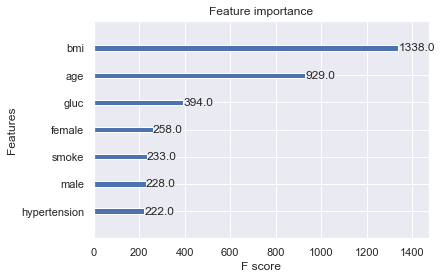

In [26]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(final_cl)

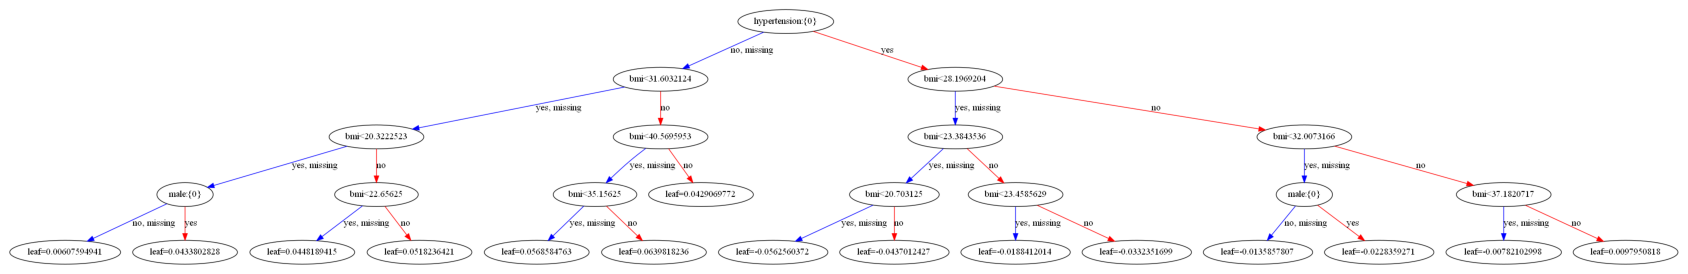

In [30]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(final_cl, ax=ax)
plt.show()

fig.set_size_inches(150, 100)
fig.savefig('tree.png')